In [172]:
# modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
# import collected data
df = pd.read_csv("./college_df.csv").iloc[:,1:] # ignore unecessary first column create from ".to_csv" in Data Collection
df

,School Name,School ID,State,School Ownership,Full-time Faculty Rate (%),Faculty Average Monthly Salary,Student Enrollment Size,Student Enrollment All,Male Students (%),Female Students (%),...,Mean Male Earnings (10 Yrs after Entry),Mean Female Earnings (10 Yrs after Entry),Std. Deviation Earning (10 Yrs after Entry),Percent of Students Earning >$25K (10 Yrs after Entry),Low Income Students (10 Yrs after Entry),Medium Income Students (10 Yrs after Entry),High Income Students (10 Yrs after Entry),Mean Earnings Low (10 Yrs after Entry),Mean Earnings Medium (10 Yrs after Entry),Mean Earnings High (10 Yrs after Entry)
0,Alabama A & M University,100654,AL,Public,99.60,7599.0,5090.0,NaN,39.78,60.22,...,38500.0,32600.0,25400.0,0.599,459.0,337.0,166.0,33000.0,37300.0,39500.0
1,University of Alabama at Birmingham,100663,AL,Public,76.19,11380.0,13549.0,NaN,38.16,61.84,...,57400.0,43200.0,39200.0,0.747,1304.0,911.0,649.0,47000.0,49500.0,49300.0
2,University of Alabama in Huntsville,100706,AL,Public,67.02,9697.0,7825.0,NaN,58.91,41.09,...,58700.0,46000.0,33600.0,0.779,682.0,454.0,378.0,47000.0,55500.0,55100.0
3,Alabama State University,100724,AL,Public,67.97,7194.0,3603.0,NaN,36.05,63.95,...,33000.0,28300.0,21400.0,0.528,1519.0,548.0,151.0,29000.0,32500.0,34300.0
4,The University of Alabama,100751,AL,Public,77.07,10349.0,30610.0,NaN,44.17,55.83,...,59100.0,45100.0,42500.0,0.786,1424.0,1545.0,2024.0,45500.0,51600.0,55800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Arizona College of Nursing-Phoenix,495457,AZ,Private ForProfit,NaN,NaN,85.0,NaN,10.59,89.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,The Pennsylvania State University,495767,PA,Public,82.80,10822.0,73189.0,NaN,53.67,46.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,Pathways College,495916,CA,Private NonProfit,NaN,NaN,13.0,NaN,46.15,53.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,Provo College-Idaho Falls Campus,496283,ID,Private ForProfit,NaN,4583.0,16.0,NaN,0.00,100.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
# df.dropna(axis = 0,thresh=15)

In [176]:
# clean up missing data
df = df.dropna(how = 'all',axis = 1) # drop columns with all nas

In [177]:
# look at BYU metrics as test case
df[(df['School Name']=='Brigham Young University')]

,School Name,School ID,State,School Ownership,Full-time Faculty Rate (%),Faculty Average Monthly Salary,Student Enrollment Size,Male Students (%),Female Students (%),Retention Rate 4 Yr (%),...,Mean Male Earnings (10 Yrs after Entry),Mean Female Earnings (10 Yrs after Entry),Std. Deviation Earning (10 Yrs after Entry),Percent of Students Earning >$25K (10 Yrs after Entry),Low Income Students (10 Yrs after Entry),Medium Income Students (10 Yrs after Entry),High Income Students (10 Yrs after Entry),Mean Earnings Low (10 Yrs after Entry),Mean Earnings Medium (10 Yrs after Entry),Mean Earnings High (10 Yrs after Entry)
1503,Brigham Young University,230038,UT,Private NonProfit,71.76,11728.0,33376.0,49.32,50.68,91.64,...,90500.0,29600.0,65400.0,0.778,4481.0,1300.0,978.0,76900.0,63800.0,62100.0


In [178]:
# look at columns, which am I really interested in?
print(list(df.columns))

['School Name', 'School ID', 'State', 'School Ownership', 'Full-time Faculty Rate (%)', 'Faculty Average Monthly Salary', 'Student Enrollment Size', 'Male Students (%)', 'Female Students (%)', 'Retention Rate 4 Yr (%)', 'Attendance Cost (Academic Year)', '150% Completion Rate at 4 Yr (%)', 'Admission Rate (%)', 'SAT Average Overall', 'SAT 75th Percentile Math', 'SAT 75th Percentile Reading', 'SAT 75th Percentile Writing', 'Mean Earnings (6 Yrs after Entry)', 'Mean Male Earnings (6 Yrs after Entry)', 'Mean Female Earnings (6 Yrs after Entry)', 'Std. Deviation Earning (6 Yrs after Entry)', 'Percent of Students Earning >$25K (6 Yrs after Entry)', 'Low Income Students (6 Yrs after Entry)', 'Medium Income Students (6 Yrs after Entry)', 'High Income Students (6 Yrs after Entry)', 'Mean Earnings Low (6 Yrs after Entry)', 'Mean Earnings Medium (6 Yrs after Entry)', 'Mean Earnings High (6 Yrs after Entry)', 'Mean Earnings (10 Yrs after Entry)', 'Mean Male Earnings (10 Yrs after Entry)', 'Mean F

In [179]:
# new columns: 
#Female_Majority female students > 50%
df = df.assign(Female_Majority = df["Female Students (%)"] > 50.00)

# Gender Diff for mean earnings
df = df.assign(MeanEarningsGenderDiff10 = df["Mean Male Earnings (10 Yrs after Entry)"]-df["Mean Female Earnings (10 Yrs after Entry)"])

# change Faculty average salary to a yearly measure
df['Faculty Average Monthly Salary'] = df['Faculty Average Monthly Salary']*12
df = df.rename(columns={'Faculty Average Monthly Salary':'Faculty Average Salary', 'Attendance Cost (Academic Year)': 'Academic Cost'})
df.head()

,School Name,School ID,State,School Ownership,Full-time Faculty Rate (%),Faculty Average Salary,Student Enrollment Size,Male Students (%),Female Students (%),Retention Rate 4 Yr (%),...,Std. Deviation Earning (10 Yrs after Entry),Percent of Students Earning >$25K (10 Yrs after Entry),Low Income Students (10 Yrs after Entry),Medium Income Students (10 Yrs after Entry),High Income Students (10 Yrs after Entry),Mean Earnings Low (10 Yrs after Entry),Mean Earnings Medium (10 Yrs after Entry),Mean Earnings High (10 Yrs after Entry),Female_Majority,MeanEarningsGenderDiff10
0,Alabama A & M University,100654,AL,Public,99.60,91188.0,5090.0,39.78,60.22,54.03,...,25400.0,0.599,459.0,337.0,166.0,33000.0,37300.0,39500.0,True,5900.0
1,University of Alabama at Birmingham,100663,AL,Public,76.19,136560.0,13549.0,38.16,61.84,86.40,...,39200.0,0.747,1304.0,911.0,649.0,47000.0,49500.0,49300.0,True,14200.0
2,University of Alabama in Huntsville,100706,AL,Public,67.02,116364.0,7825.0,58.91,41.09,81.80,...,33600.0,0.779,682.0,454.0,378.0,47000.0,55500.0,55100.0,False,12700.0
3,Alabama State University,100724,AL,Public,67.97,86328.0,3603.0,36.05,63.95,62.02,...,21400.0,0.528,1519.0,548.0,151.0,29000.0,32500.0,34300.0,True,4700.0
4,The University of Alabama,100751,AL,Public,77.07,124188.0,30610.0,44.17,55.83,87.23,...,42500.0,0.786,1424.0,1545.0,2024.0,45500.0,51600.0,55800.0,True,14000.0


In [180]:
# filter down the columns
keep_cols = [0,2,3,4,5,6,9,10,12,13,28,39,40]
df_c = df.iloc[:,keep_cols]
df_c.head()

,School Name,State,School Ownership,Full-time Faculty Rate (%),Faculty Average Salary,Student Enrollment Size,Retention Rate 4 Yr (%),Academic Cost,Admission Rate (%),SAT Average Overall,Mean Earnings (10 Yrs after Entry),Female_Majority,MeanEarningsGenderDiff10
0,Alabama A & M University,AL,Public,99.60,91188.0,5090.0,54.03,23445.0,89.65,959.0,35500.0,True,5900.0
1,University of Alabama at Birmingham,AL,Public,76.19,136560.0,13549.0,86.40,25542.0,80.60,1245.0,48400.0,True,14200.0
2,University of Alabama in Huntsville,AL,Public,67.02,116364.0,7825.0,81.80,24861.0,77.11,1300.0,52000.0,False,12700.0
3,Alabama State University,AL,Public,67.97,86328.0,3603.0,62.02,21892.0,98.88,938.0,30600.0,True,4700.0
4,The University of Alabama,AL,Public,77.07,124188.0,30610.0,87.23,30016.0,80.39,1262.0,51600.0,True,14000.0


In [181]:
# sns.set_style("whitegrid")
# sns.set_palette("deep")
# grid = sns.PairGrid(df.iloc[:,2:],hue = "School Ownership")
# grid.map_diag(sns.histplot)
# grid.map_lower(sns.kdeplot)
# grid.map_upper(sns.scatterplot)
# grid.add_legend()

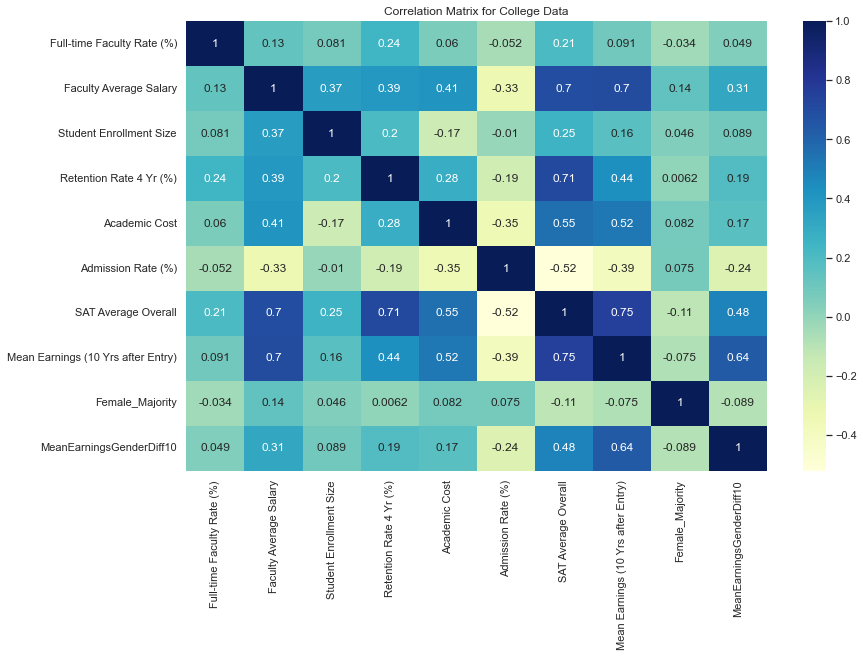

In [182]:
cm = sns.heatmap(df_c.corr(),annot=True, cmap = "YlGnBu")
cm.set(title = 'Correlation Matrix for College Data')
sns.set(rc={'figure.figsize':(13,8.27)})

In [189]:
import plotly.express as px

In [190]:
# plots to make:
# faculty salary by mean earnings 6,10 years
# hue = school ownership
fe = px.scatter(data_frame = df_c, color="School Ownership",
                x = "Faculty Average Salary", y = "Mean Earnings (10 Yrs after Entry)",
                hover_name=df['School Name'], trendline='ols',template = 'ggplot2',
               title = 'Mean Earnings of College Students vs. Faculty Average Salary')
fe.update_layout(hovermode='closest')
fe.write_html('facavg_meanearn.html')




In [191]:
fig = px.scatter(data_frame = df_c, color="School Ownership",
                 x = "SAT Average Overall", y = "Mean Earnings (10 Yrs after Entry)",
                 hover_name=df['School Name'],trendline='ols',
#                  color_discrete_map={ # replaces default color mapping by value
#                 "True": "RebeccaPurple", "False": "MediumGreen"},
                 template = 'ggplot2')
fig.show()


In [192]:
fig = px.scatter(data_frame = df.dropna(), #color="School Ownership",
                 x = "Admission Rate (%)", y = "SAT Average Overall",
                 hover_name='School Name',
#                  color_discrete_map={ # replaces default color mapping by value
#                 "True": "RebeccaPurple", "False": "MediumGreen"},
                 template = 'plotly_white',
                title = 'Relationship between SAT scores and Retention Rates')
fig.update_layout(hovermode='x')

In [193]:
# SAT overage with retention rate
fig = px.scatter(data_frame = df.dropna(), #color="School Ownership",
                 x = "SAT Average Overall", y = "Retention Rate 4 Yr (%)",
                 hover_name='School Name', trendline = 'ols',
#                  color_discrete_map={ # replaces default color mapping by value
#                 "True": "RebeccaPurple", "False": "MediumGreen"},
                 template = 'plotly_white',
                title = 'Relationship between SAT scores and Retention Rates')
fig.update_layout(hovermode='closest')

In [194]:
fig = px.scatter(data_frame = df_c, color="Female_Majority",
                 x = "Faculty Average Salary", y = "Mean Earnings (10 Yrs after Entry)",
                 hover_name=df['School Name'],trendline='ols',
                 color_discrete_map={ # replaces default color mapping by value
                "True": "RebeccaPurple", "False": "MediumGreen"},
                 template = 'plotly_white')
fig.show()

In [195]:
# plotly express plots are helpful and very cool, but take up lots of space in markdown file

In [196]:
# Seaborn plots

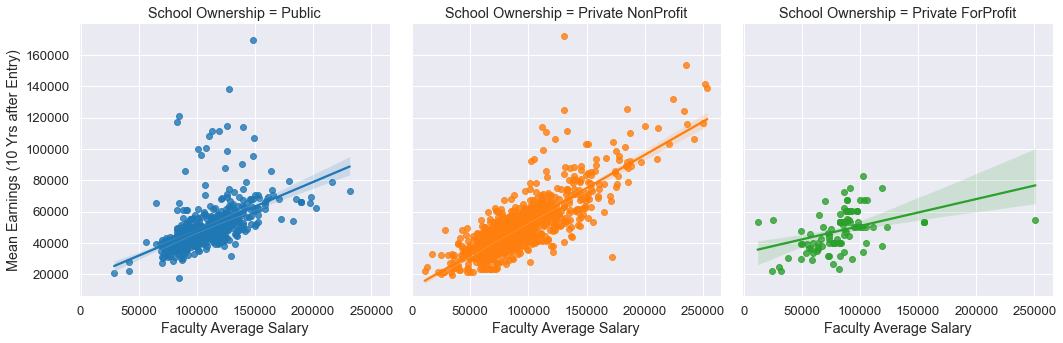

In [268]:
fe = sns.lmplot(data = df_c, x = "Faculty Average Salary", y = "Mean Earnings (10 Yrs after Entry)",
                col = 'School Ownership',hue='School Ownership')

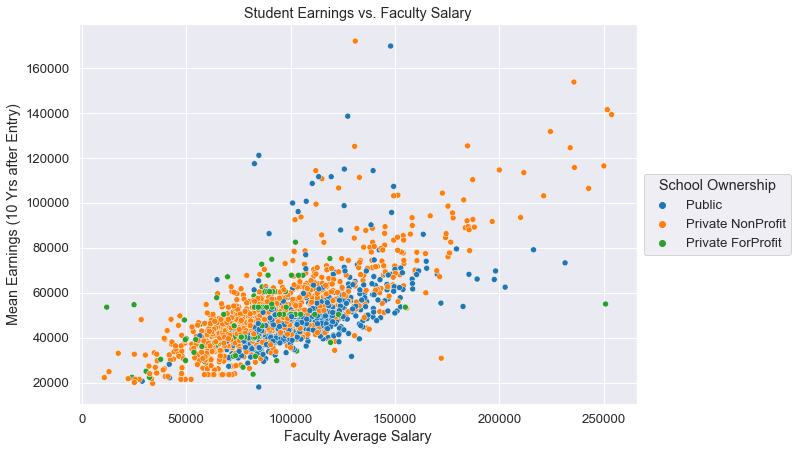

In [264]:
fig = sns.scatterplot(data = df_c, x = "Faculty Average Salary", y = "Mean Earnings (10 Yrs after Entry)",
                     hue = 'School Ownership',palette = 'tab10')
fig.set(title = 'Student Earnings vs. Faculty Salary')
sns.move_legend(fig, "center left", bbox_to_anchor=(1, 0.5))

[Text(0.5, 1.0, 'Mean Earnings vs. SAT Overall Scores, with Female Majority Specification')]

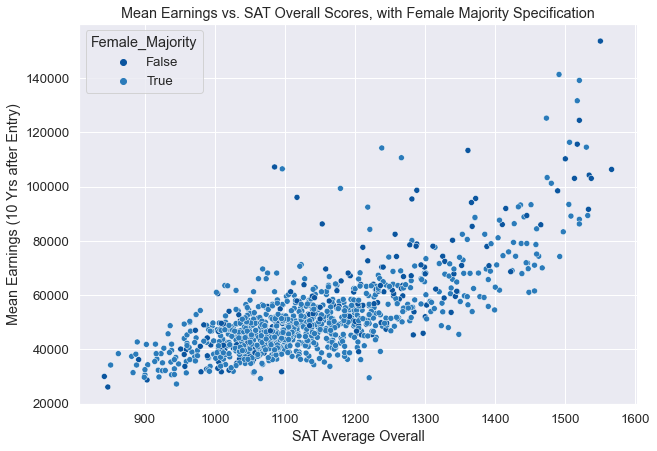

In [244]:
plt.figure(figsize=(10,7))
sns.set(rc={"figure.figsize":(10, 7)},palette = 'Blues_r',font_scale = 1.2)
fig = sns.scatterplot(data = df_c, x = "SAT Average Overall", y = "Mean Earnings (10 Yrs after Entry)",
                         hue= 'Female_Majority')
fig.set(title = 'Mean Earnings vs. SAT Overall Scores, with Female Majority Specification')

<AxesSubplot:xlabel='SAT Average Overall', ylabel='Retention Rate 4 Yr (%)'>

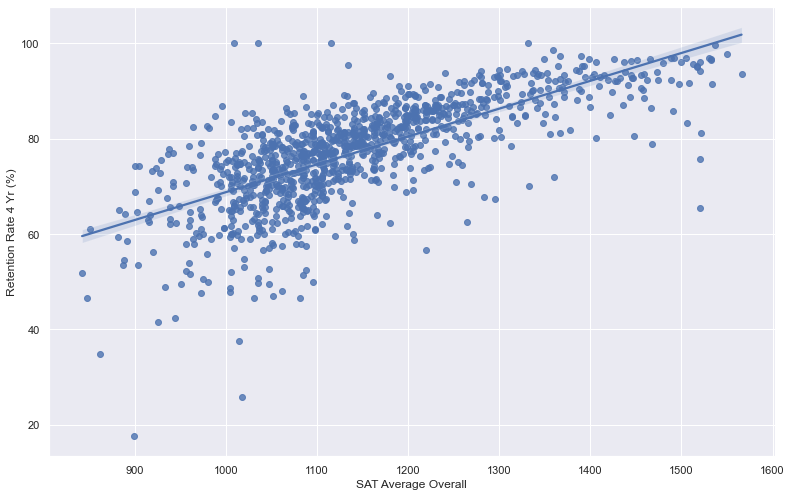

In [200]:
fig = sns.regplot(data = df_c, x = "SAT Average Overall", y = "Retention Rate 4 Yr (%)")
fig

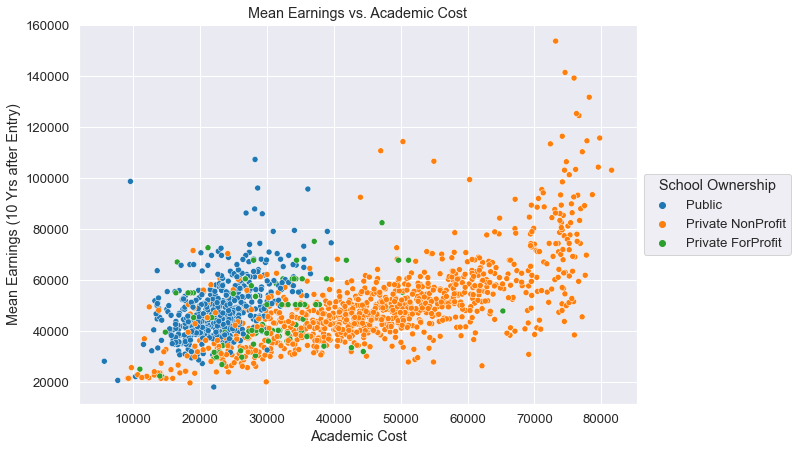

In [266]:
plt.figure(figsize=(10,7))
sns.set(rc={"figure.figsize":(10, 7)},palette = 'tab10',font_scale = 1.2)
fig = sns.scatterplot(data = df_c, x = "Academic Cost", y = "Mean Earnings (10 Yrs after Entry)",
                         hue= 'School Ownership')
fig.set(title = 'Mean Earnings vs. Academic Cost')
sns.move_legend(fig, "center left", bbox_to_anchor=(1, 0.5))

[Text(0.5, 1.0, 'Retention Rates for U.S Colleges by School Ownership')]

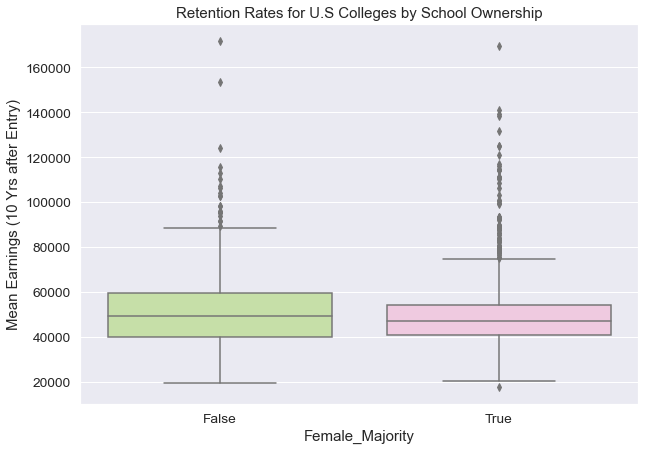

In [253]:
sns.set(font_scale = 1.25)
sme = sns.boxplot(data=df, x="Female_Majority", y = "Mean Earnings (10 Yrs after Entry)",
           palette = "PiYG_r")
sme.set(title = 'Retention Rates for U.S Colleges by School Ownership')

In [201]:
# sns.set_style("darkgrid")
# sns.boxplot(data=df, x="School Ownership", y = "Mean Earnings (6 Yrs after Entry)",
#            palette = "Blues")

[Text(0.5, 1.0, 'Mean Earnings for U.S Colleges Students by School Ownership')]

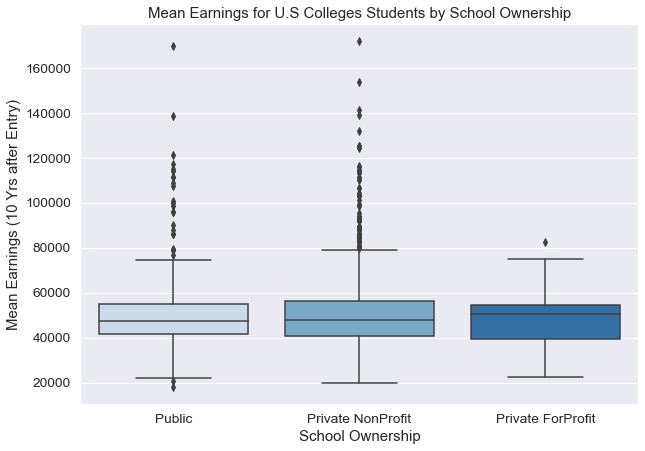

In [251]:
sns.set(font_scale = 1.25)
sme = sns.boxplot(data=df, x="School Ownership", y = "Mean Earnings (10 Yrs after Entry)",
           palette = "Blues")
sme.set(title = 'Mean Earnings for U.S Colleges Students by School Ownership')



<AxesSubplot:xlabel='School Ownership', ylabel='MeanEarningsGenderDiff10'>

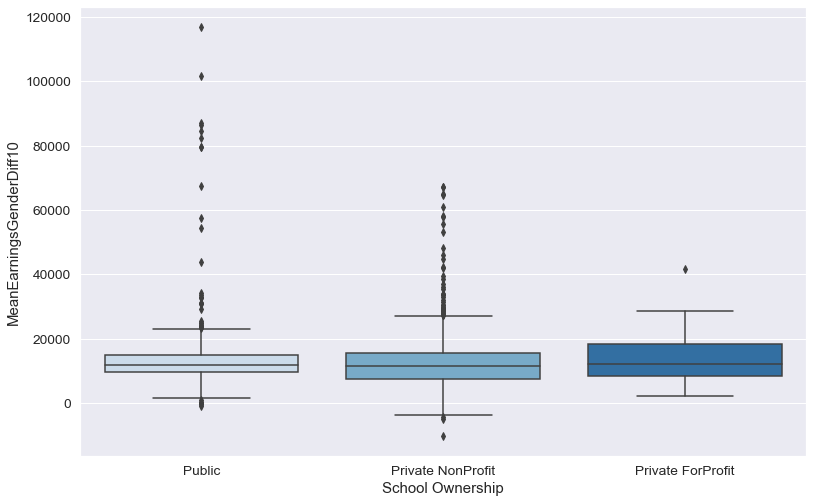

In [148]:
sns.boxplot(data=df, x="School Ownership", y = "MeanEarningsGenderDiff10",
           palette = "Blues")

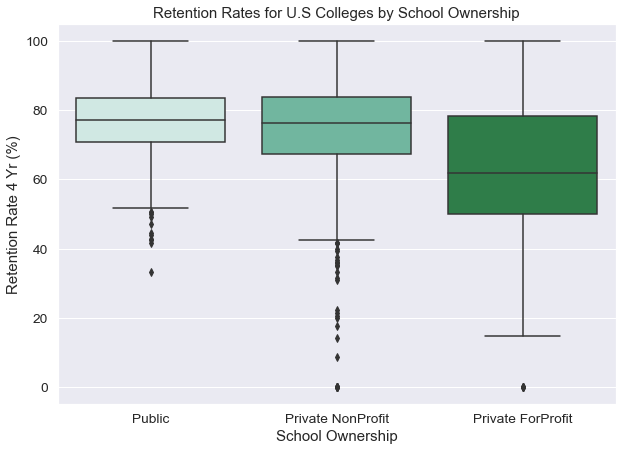

In [147]:
plt.figure(figsize=(10,7))
rr = sns.boxplot(data=df, x="School Ownership", y = "Retention Rate 4 Yr (%)",
           palette = "BuGn")
rr.set(title = 'Retention Rates for U.S Colleges by School Ownership')
sns.set(font_scale = 1.25)

In [137]:
top10states = list(df.groupby('State')["Mean Earnings (10 Yrs after Entry)"].mean().sort_values(ascending=False).index[0:10])
top10states

['DC', 'MA', 'RI', 'CT', 'CA', 'MD', 'NJ', 'NY', 'NH', 'IL']

<AxesSubplot:xlabel='State', ylabel='Mean Earnings (10 Yrs after Entry)'>

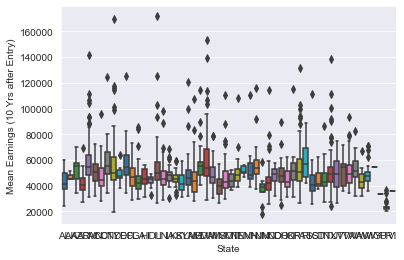

In [170]:
sns.boxplot(data=df, x="State", y = "Mean Earnings (10 Yrs after Entry)",
           palette = "tab10")